# Problem Bank Churn Prediction

Goal:
Predict whether a bank customer will leave (churn) or stay, so the bank can take preventive actions.

Why it matters:

Acquiring new customers is costly

Retaining customers increases profit

Early churn prediction → targeted offers

Target Variable:
Exited (1 = churn, 0 = stay)

# import the important lib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2

# Load the Dataset

In [2]:
df=pd.read_csv("Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# EDA

In [3]:
#drop the less imp columns
df=df.drop(columns=['RowNumber','CustomerId','Surname'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df=df.rename(columns={'Card Type':'Card_Type','Point Earned':'Point_Earned','Satisfaction Score':'Satisfaction_Score'})

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [37]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

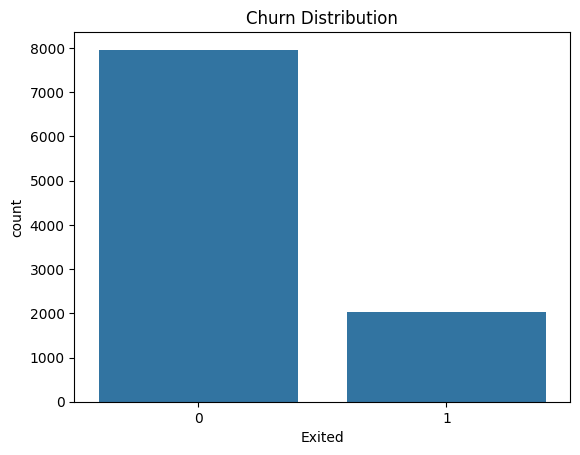

In [38]:
#Target Variable Analysis

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution")
plt.show()


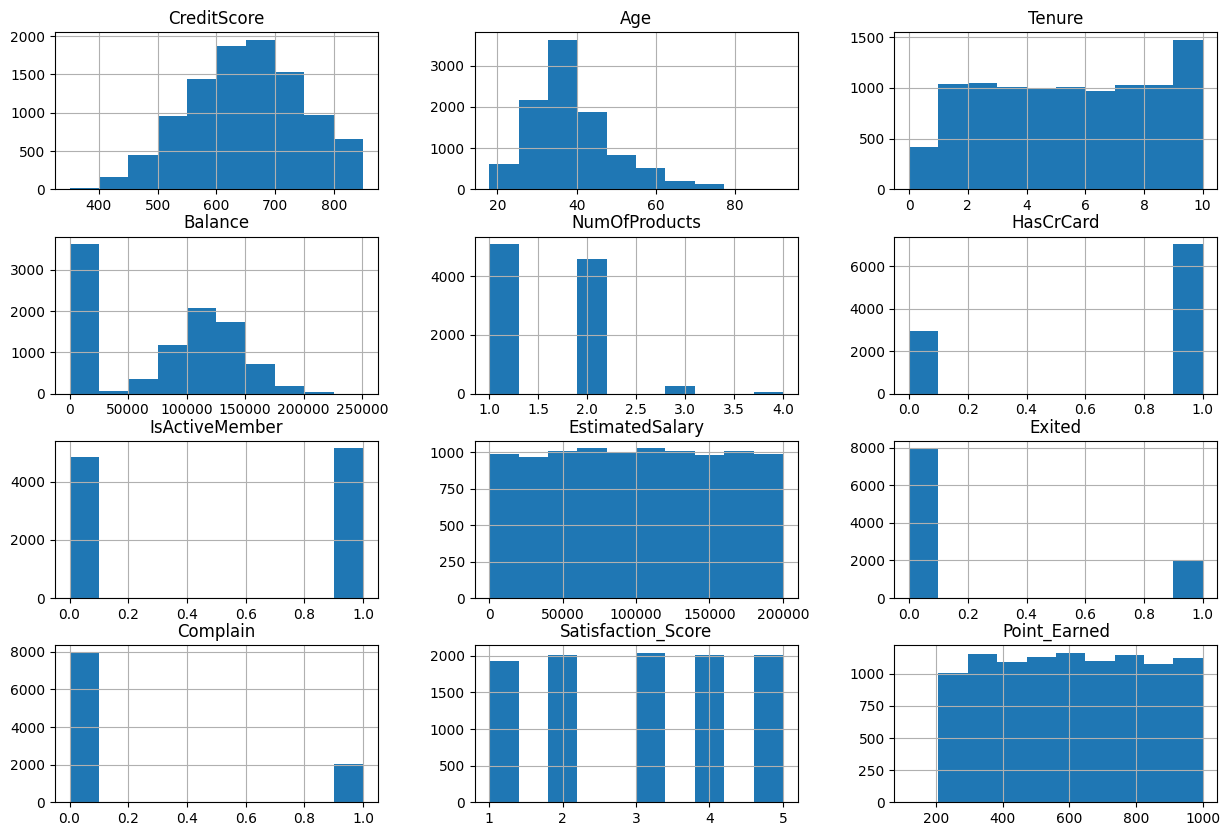

In [40]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(15,10))
plt.show()


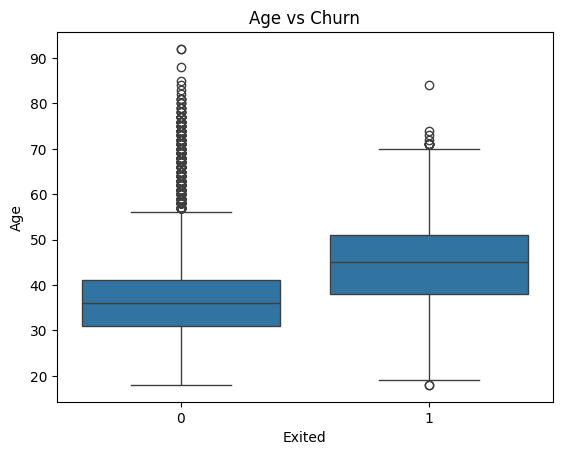

In [41]:
#Age vs Churn
sns.boxplot(x='Exited', y='Age', data=df)
plt.title("Age vs Churn")
plt.show()


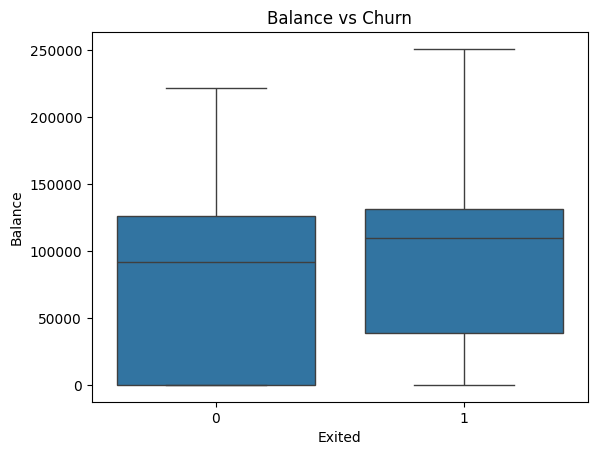

In [42]:
#Balance vs Churn
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title("Balance vs Churn")
plt.show()


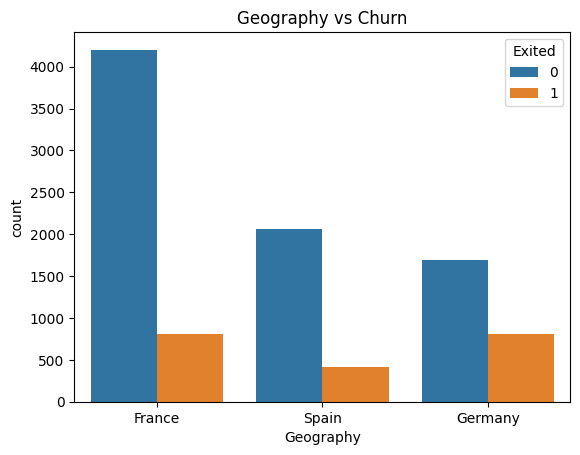

In [43]:
#Categorical Features Analysis
cat_cols = df.select_dtypes(include='object').columns
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title("Geography vs Churn")
plt.show()


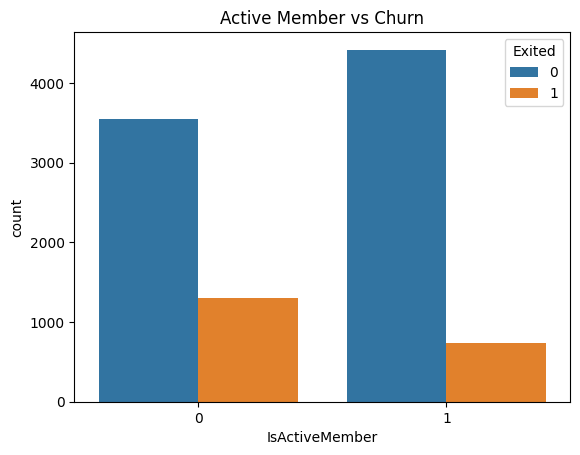

In [45]:
#Active Member vs Churn
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title("Active Member vs Churn")
plt.show()

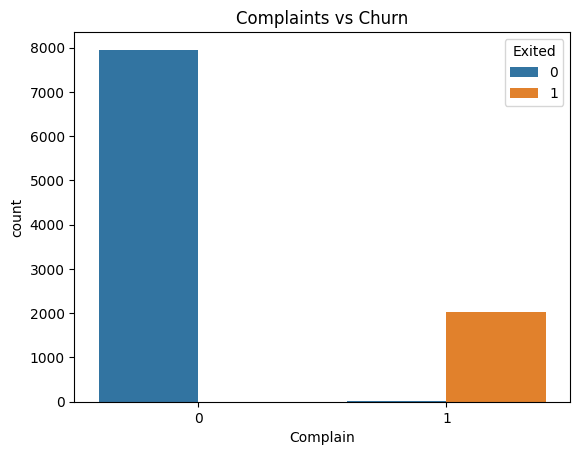

In [46]:
sns.countplot(x='Complain', hue='Exited', data=df)
plt.title("Complaints vs Churn")
plt.show()


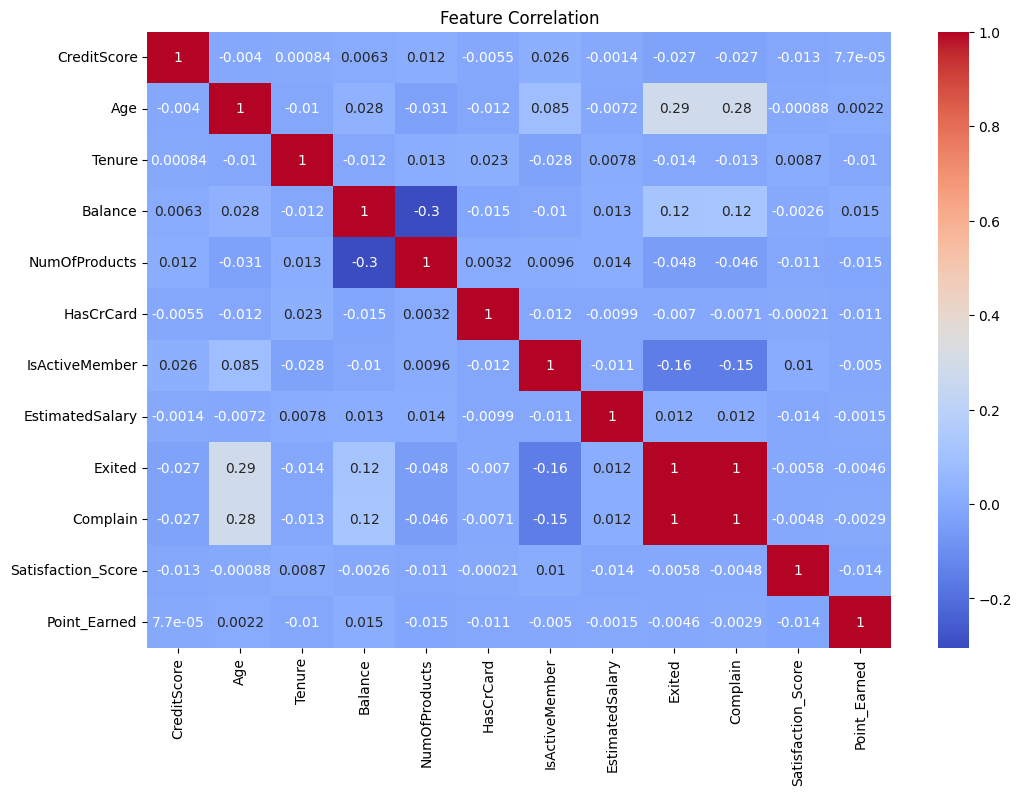

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


# Preprocessing pipeline

In [13]:
x=df.drop(columns=['Exited'])
y=df['Exited']

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import joblib

cat_cols = ['Geography', 'Gender', 'Card_Type']
num_cols = [c for c in x.columns if c not in cat_cols]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

x= preprocessor.fit_transform(x)
joblib.dump(preprocessor, "preprocessor.pkl")

['preprocessor.pkl']

In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction_Score', 'Card_Type',
       'Point_Earned'],
      dtype='object')

# Train-Test Split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Selection

In [17]:
model = Sequential()
model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.001), input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

# Model Training

In [19]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='auto',
    restore_best_weights=True
    
)

In [24]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),callbacks=callback)

Epoch 1/100
250/250 [==============================] - 5s 9ms/step - loss: 0.2915 - accuracy: 0.9187 - val_loss: 0.0985 - val_accuracy: 0.9990
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 0.0955 - accuracy: 0.9969 - val_loss: 0.0669 - val_accuracy: 0.9990
Epoch 3/100
250/250 [==============================] - 2s 6ms/step - loss: 0.0742 - accuracy: 0.9971 - val_loss: 0.0564 - val_accuracy: 0.9990
Epoch 4/100
250/250 [==============================] - 2s 6ms/step - loss: 0.0597 - accuracy: 0.9979 - val_loss: 0.0483 - val_accuracy: 0.9990
Epoch 5/100
250/250 [==============================] - 2s 6ms/step - loss: 0.0506 - accuracy: 0.9980 - val_loss: 0.0416 - val_accuracy: 0.9990
Epoch 6/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0437 - accuracy: 0.9980 - val_loss: 0.0362 - val_accuracy: 0.9990
Epoch 7/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0416 - accuracy: 0.9973 - val_loss: 0.0332 - val_accuracy: 0.9990

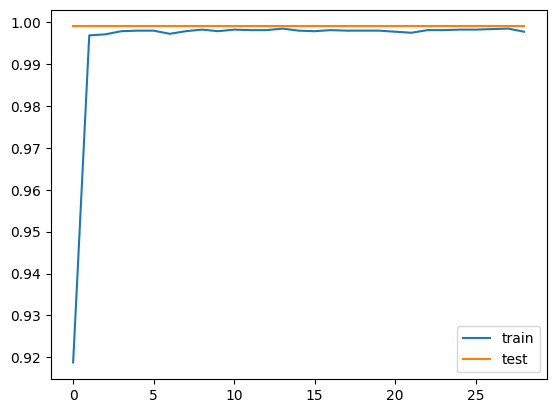

In [25]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

In [26]:
model.layers[0].get_weights()  #this gives the weight passed to 1st hidden layer,bias last three array is bias of hidden layer

[array([[-5.5818851e-03, -7.6286490e-03, -1.4306764e-03, ...,
          5.2286503e-03,  7.4944808e-05,  6.7109659e-02],
        [-4.9616504e-02,  7.7237049e-03,  2.8303864e-03, ...,
         -3.5302453e-02,  1.1338894e-01, -2.5124431e-03],
        [ 3.3769991e-02,  2.9443664e-02,  1.9913057e-03, ...,
         -6.0621768e-02,  8.3994597e-02,  2.4376698e-03],
        ...,
        [-1.2354430e-01,  5.1768620e-02, -1.2864130e-04, ...,
         -7.6357513e-03, -9.6127437e-03,  5.4179672e-02],
        [-1.8019328e-02,  4.8317302e-02, -7.8131498e-06, ...,
         -2.0747229e-02, -2.5274668e-02,  3.3008344e-03],
        [-2.1038514e-02,  1.6906792e-02, -1.8772424e-06, ...,
         -9.8546501e-03,  5.5343527e-02, -7.4240603e-03]], dtype=float32),
 array([-0.1823405 ,  0.09356781, -0.1385945 , -0.15896806,  0.08467289,
         0.02930138, -0.07734384, -0.06535389,  0.16277966,  0.01019894,
         0.0498728 ,  0.02859153, -0.02431602,  0.05199831,  0.00997004,
        -0.13654077, -0.0852806

In [27]:
model.layers[3].get_weights()

[array([[ 0.01188783, -0.00743646, -0.00125095, ..., -0.0155424 ,
          0.06712361,  0.02088777],
        [-0.03670173,  0.01877893, -0.00934364, ...,  0.03449197,
          0.02073139,  0.03867288],
        [ 0.00048114,  0.00070816, -0.00020833, ...,  0.00020909,
          0.00025303, -0.0013565 ],
        ...,
        [-0.01415045, -0.01827241, -0.01264022, ..., -0.00923529,
         -0.00768657,  0.01219753],
        [ 0.04170567,  0.02707091,  0.02735178, ...,  0.00452858,
          0.01796342,  0.01671352],
        [-0.02211381, -0.00323191,  0.06953001, ...,  0.00960322,
         -0.02802947,  0.04862204]], dtype=float32),
 array([-0.09864717,  0.10877541,  0.14080852,  0.09268048,  0.11226305,
         0.09185974,  0.13847736,  0.08717604,  0.04548256,  0.11505744,
        -0.07175592,  0.10389194, -0.01028768, -0.12182688,  0.12934515,
         0.0821303 ,  0.07275387, -0.01668641,  0.14648636, -0.12632988,
         0.0367419 , -0.0044329 ,  0.09173319,  0.07974111,  0.051

In [28]:
y_log=model.predict(x_test)

63/63 [==============================] - 1s 3ms/step


In [29]:
y_log[:30]

array([[2.55725354e-05],
       [1.19964043e-05],
       [1.84086093e-05],
       [7.08160514e-05],
       [1.78186619e-05],
       [3.45616681e-05],
       [3.37634672e-04],
       [9.99585629e-01],
       [6.53385941e-05],
       [2.51824695e-05],
       [9.99999702e-01],
       [9.99946535e-01],
       [9.99983251e-01],
       [5.47505333e-05],
       [2.21872278e-06],
       [1.18952674e-04],
       [2.47658727e-06],
       [8.42476038e-06],
       [2.13040880e-06],
       [1.12468688e-05],
       [1.43571533e-05],
       [3.51388044e-05],
       [9.99975085e-01],
       [1.17727752e-04],
       [1.44793357e-05],
       [9.99947667e-01],
       [4.33547066e-05],
       [4.66113897e-06],
       [1.10310611e-06],
       [9.73753413e-05]], dtype=float32)

# Model Evaluation

In [30]:
y_pred=np.where(y_log>0.5,1,0)

In [31]:
#Model Saving
model.save("churn.h5")

In [32]:
from sklearn.metrics import classification_report
confusion_matrix=classification_report(y_test, y_pred)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [33]:
import gradio as gr
from PIL import Image
import tensorflow as tf

model=tf.keras.models.load_model("churn.h5")
preprocessor = joblib.load("preprocessor.pkl")

def predict_exit(
    CreditScore, Geography, Gender, Age, Tenure, Balance,
    NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary,
    Complain, Satisfaction_Score, Card_Type, Point_Earned
):
    # Preprocess input data
    X_input = preprocessor.transform(input_df)
    # Prediction
    prediction = model.predict(X_input)

    return "Exited ❌" if prediction == 1 else "Not Exited ✅"

# Gradio Interface
interface = gr.Interface(
    fn=predict_exit,
    inputs=[
        gr.Number(label="Credit Score"),
        gr.Dropdown(["France", "Germany", "Spain"], label="Geography"),
        gr.Dropdown(["Male", "Female"], label="Gender"),
        gr.Number(label="Age"),
        gr.Number(label="Tenure"),
        gr.Number(label="Balance"),
        gr.Number(label="Number of Products"),
        gr.Radio([0, 1], label="Has Credit Card"),
        gr.Radio([0, 1], label="Is Active Member"),
        gr.Number(label="Estimated Salary"),
        gr.Radio([0, 1], label="Complain"),
        gr.Slider(1, 10, step=1, label="Satisfaction Score"),
        gr.Dropdown(["Silver", "Gold", "Platinum", "Diamond"], label="Card Type"),
        gr.Number(label="Points Earned")
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="Bank Customer Churn Prediction",
    description="Predict whether a customer will exit based on profile data"
)

interface.launch()  

C:\Users\dnyan\anaconda3\envs\ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
